In [15]:
import numpy as np
import pandas as pd
import scipy.signal as signal

In [16]:
data = pd.read_csv("C:\\Users\\mahdi\\Desktop\\bridge\\0x8_off_1k\\analog.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mahdi\\Desktop\\bridge\\0x8_off_1k.csv'

In [ ]:
datatime = np.ravel(data[["Time [s]"]].to_numpy())
bridge_ac = np.ravel(data[["Bridge-in"]].to_numpy())
len(bridge_ac)

1692876

In [ ]:
sampling_rate = np.mean(np.ediff1d(datatime))
print(f'sampling_period={sampling_rate}')
fs = 1 / sampling_rate
print(f'sampling rate={fs}')

sampling_period=6.400000000000001e-07
sampling rate=1562499.9999999998


In [ ]:
# zero mean the signal
bridge_ac -= np.mean(bridge_ac)
np.mean(bridge_ac)

9.095314151371067e-18

In [ ]:
driven_ac = 8572
samples_per_resonance_period = fs / driven_ac
print(f'samples_per_resonance_period={samples_per_resonance_period}')

# evaluate 100 cycles
sample_count = int(np.ceil(samples_per_resonance_period * 40))
sig = bridge_ac[:sample_count]
print(f'len(sig)={len(sig)}')

#Nfft = util.nextpow2(sample_count)
Nfft = 8192*2
print(f'Nfft={Nfft}')

ffted = np.fft.rfft(sig, Nfft)
freqs = np.linspace(0, fs//2, num=ffted.size)

samples_per_resonance_period=182.27951469902004
len(sig)=7292
Nfft=16384


array([  381.46923828,   953.6730957 ,  1811.97888184, 10108.93481445,
       20217.86962891, 30326.80444336, 40340.37194824, 50449.3067627 ,
       59127.73193359, 68092.2590332 , 68282.99365234, 68569.09558105,
       68950.56481934, 69332.03405762, 69713.5032959 , 69999.60522461])

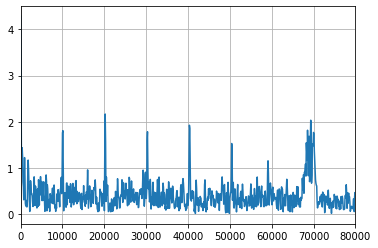

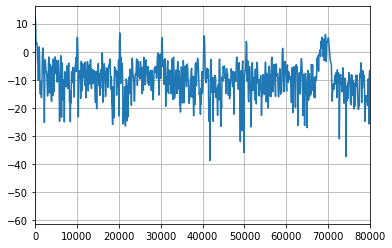

In [ ]:
import matplotlib.pyplot as plt
amplitude = np.abs(ffted)
magnitude = 20 * np.log10(amplitude)
plt.plot(freqs, amplitude)
#plt.xlim(5e3, 100e3)
plt.xlim(0, 80e3)
#plt.xlim(25e3, 35e3)
#plt.xlim(0,50e3)
plt.grid()
plt.figure()
plt.plot(freqs, magnitude)
#plt.xlim(5e3, 100e3)
plt.xlim(0, 80e3)
plt.grid()
peaks = signal.find_peaks(magnitude, height=0)
peak_freqs = freqs[peaks[0]]
peak_freqs